# Project 2 

The framework should import only torch.empty, and use no pre-existing neural-network python toolbox. Your code should work with autograd globally off, which can be achieved with torch . set˙grad˙enabled ( False )

In [1]:
import math
import torch 
torch.set_grad_enabled(False)

### Build the data

Generates a training and a test set of 1, 000 points sampled uniformly in [0, 1]², each with a label 0 if outside the disk centered at (0.5, 0.5) of radius 1/sqrt(2π), and 1 inside.

In [2]:
def build_data(n):
       
    x = torch.empty(n, 2) #(n,2)
    x = x.uniform_(0, 1)
    
    x_centered = x - 0.5
    norm_squared = x_centered.pow(2).sum(dim=1)  #(n,)
    
    r_squared = 1/ (2*math.pi)
    
    y = norm_squared.sub(r_squared).sign().add(1).div(2)
    return x, y

In [3]:
X_train, y_train = build_data(1000)  #(1000,2) , #(1000)
X_test, y_test = build_data(1000)  #(1000,2) , #(1000)

In [4]:
x = X_train[:,0]
y = X_train[:,1]
colors = { 1.0 : 'g', 0 : 'y'}

In [5]:
c = [ colors[label] for label in y_train.numpy()]

In [6]:
def one_hot_encoding(target):
    encoded = torch.empty(target.shape[0], 2)
    for i in range(target.shape[0]): 
        if(target[i]):
            encoded[i,0] = 0
            encoded[i,1] = target[i]
        else : 
            encoded[i,0] = 1
            encoded[i,1] = target[i]
    return encoded

In [7]:
encoded_y_train = one_hot_encoding(y_train)
encoded_y_test = one_hot_encoding(y_test)

### Visualize the data

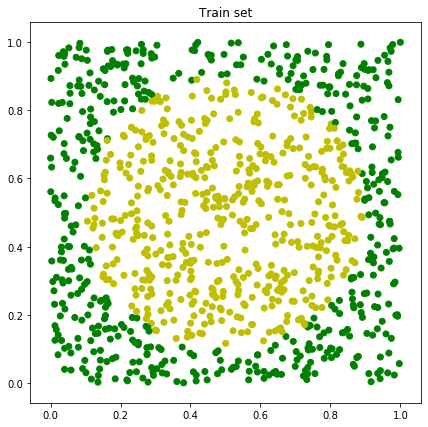

In [8]:
import matplotlib.pyplot as plt  # This is python's popular plotting library.

plt.figure(figsize=(7,7))
plt.scatter(x, y, c = c)
plt.title('Train set')
plt.show()

### Build the network

In [14]:
from linear import Linear
from activation_function.tanh import Tanh
from activation_function.sigmoid import Sigmoid
from sequential import Sequential
from optimizer.sgd import SGD
from loss.mse import MSELoss
from activation_function.relu import ReLU

In [15]:
input_units = 2
hidden_units = 25
output_units = 2

model = Sequential(
            Linear(input_units, hidden_units),
            ReLU(),
            Linear(hidden_units, hidden_units),
            ReLU(),
            Linear(hidden_units, hidden_units),
            ReLU(),
            Linear(hidden_units, output_units),
            Sigmoid()
)

In [37]:
def train_model(model, X_train, y_train, epochs, mini_batch_size , lr = 0.01):
    
    total_loss = []
    
    criterion = MSELoss(model)
    optimizer = SGD(model, lr)
    
    #one hot encoding 
    encoded_y_train = one_hot_encoding(y_train)
    
    number_batches =  X_train.size(0) // mini_batch_size
    
    for epoch in range(epochs):
        
        loss_epoch = 0
        
        for index in range(0, X_train.size(0), mini_batch_size):
            X_train_batched = X_train[index:(index+mini_batch_size)]
            y_train_batched = encoded_y_train[index:(index+mini_batch_size)]
            
            #forward pass
            output = model.forward(X_train_batched)
            loss = criterion.forward(output, y_train_batched)
            loss_epoch += loss.item() 
                        
            #backward pass and update parameters gradient
            criterion.backward()  
            #update parameters
            optimizer.step()
            for p in model.param():
                print(p)
        
        total_loss.append(loss_epoch / number_batches)
        
    return model, total_loss

In [38]:
epochs = 25
mini_batch_size = 1
model_trained, loss_epoch =  train_model(model, X_train, y_train, epochs, mini_batch_size , lr = 0.1)

[tensor([[-2.4402e+03, -2.4524e+03],
        [ 1.9899e-01, -2.1659e-01],
        [-4.7723e-01,  3.3788e-02],
        [ 1.1523e-01,  2.2208e-01],
        [-1.3993e-01,  2.2082e-01],
        [-2.4346e+03, -2.4457e+03],
        [ 4.3334e-01, -1.6199e-01],
        [-3.5201e-01, -3.6460e-02],
        [-3.0117e-01, -3.4263e-01],
        [-4.5693e-01,  1.3700e-01],
        [-4.9371e+03, -4.8500e+03],
        [-4.9370e+03, -4.8495e+03],
        [ 1.4664e-01,  3.9559e-01],
        [-4.9369e+03, -4.8494e+03],
        [-4.9373e+03, -4.8500e+03],
        [ 1.6772e-02, -9.8281e-02],
        [-2.0294e-01, -4.3151e-01],
        [-4.9373e+03, -4.8491e+03],
        [-2.4400e+03, -2.4524e+03],
        [-4.9372e+03, -4.8498e+03],
        [ 8.2582e-02,  1.9099e-01],
        [-4.9370e+03, -4.8498e+03],
        [-4.9371e+03, -4.8493e+03],
        [-2.4968e+03, -2.3980e+03],
        [-7.4656e-02, -4.0272e-01]]), tensor([[0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.

        [0.0000, 0.0000]])]
[tensor([[-5.0416e+03, -1.6006e-02, -3.4360e-01,  5.7828e-02, -5.4763e-01,
         -5.0297e+03,  1.0887e-02,  4.1480e-01, -2.5860e-01, -3.7065e-02,
         -1.0003e+04, -1.0003e+04,  3.7619e-03, -1.0003e+04, -1.0003e+04,
         -3.3153e-01, -2.0209e-01, -1.0003e+04, -5.0414e+03, -1.0003e+04,
         -1.8789e-01, -1.0003e+04, -1.0004e+04, -4.9606e+03,  1.5153e-02]]), tensor([4., 0., 0., 0., 0., 4., 0., 0., 0., 0., 4., 4., 0., 4., 4., 0., 0., 4.,
        4., 4., 0., 4., 4., 0., 0.])]
[tensor([[ 3.3119e-01,  1.7531e-01, -1.2326e-01, -1.2827e-01,  9.1825e-02,
          3.4377e-01,  5.4953e-02,  2.7602e-01, -2.7828e-01, -1.9343e-01,
         -6.4756e-02,  2.7352e-01, -3.6001e-01,  1.8948e-01,  3.0831e-02,
          1.6165e-01, -2.2520e-01,  2.2061e-01,  1.0767e-01, -4.2583e-02,
         -2.2243e-01,  1.3092e-01,  2.2057e-01, -2.3726e-01, -4.5431e-02],
        [ 3.0498e-01, -2.4124e+02, -1.9860e-01, -2.2250e+03, -1.8507e-01,
          1.8247e-01, -1.5474e+03,

        [0.0000, 0.0000]])]
[tensor([[-5.0428e+03, -1.6006e-02, -3.4360e-01,  5.7828e-02, -5.4763e-01,
         -5.0309e+03,  1.0887e-02,  4.1480e-01, -2.5860e-01, -3.7065e-02,
         -1.0004e+04, -1.0005e+04,  3.7619e-03, -1.0005e+04, -1.0004e+04,
         -3.3153e-01, -2.0209e-01, -1.0005e+04, -5.0426e+03, -1.0004e+04,
         -1.8789e-01, -1.0005e+04, -1.0005e+04, -4.9610e+03,  1.5153e-02]]), tensor([4., 0., 0., 0., 0., 4., 0., 0., 0., 0., 4., 4., 0., 4., 4., 0., 0., 4.,
        4., 4., 0., 4., 4., 0., 0.])]
[tensor([[ 3.3119e-01,  1.7531e-01, -1.2326e-01, -1.2827e-01,  9.1825e-02,
          3.4377e-01,  5.4953e-02,  2.7602e-01, -2.7828e-01, -1.9343e-01,
         -6.4756e-02,  2.7352e-01, -3.6001e-01,  1.8948e-01,  3.0831e-02,
          1.6165e-01, -2.2520e-01,  2.2061e-01,  1.0767e-01, -4.2583e-02,
         -2.2243e-01,  1.3092e-01,  2.2057e-01, -2.3726e-01, -4.5431e-02],
        [ 3.0498e-01, -2.4124e+02, -1.9860e-01, -2.2255e+03, -1.8507e-01,
          1.8247e-01, -1.5477e+03,

[tensor([[-0.0100,  0.0100]]), tensor([-0.2543,  0.2543])]
[tensor([[-2.4417e+03, -2.4544e+03],
        [ 1.9899e-01, -2.1659e-01],
        [-4.7723e-01,  3.3788e-02],
        [ 1.1523e-01,  2.2208e-01],
        [-1.3993e-01,  2.2082e-01],
        [-2.4361e+03, -2.4477e+03],
        [ 4.3334e-01, -1.6199e-01],
        [-3.5201e-01, -3.6460e-02],
        [-3.0117e-01, -3.4263e-01],
        [-4.5693e-01,  1.3700e-01],
        [-4.9397e+03, -4.8531e+03],
        [-4.9395e+03, -4.8526e+03],
        [ 1.4664e-01,  3.9559e-01],
        [-4.9394e+03, -4.8525e+03],
        [-4.9399e+03, -4.8531e+03],
        [ 1.6772e-02, -9.8281e-02],
        [-2.0294e-01, -4.3151e-01],
        [-4.9399e+03, -4.8523e+03],
        [-2.4415e+03, -2.4544e+03],
        [-4.9397e+03, -4.8529e+03],
        [ 8.2582e-02,  1.9099e-01],
        [-4.9395e+03, -4.8529e+03],
        [-4.9396e+03, -4.8524e+03],
        [-2.4979e+03, -2.3991e+03],
        [-7.4656e-02, -4.0272e-01]]), tensor([[0.4085, 3.9032],
        [0.0

         -0.]])]
[tensor([[-5043.4194, -4962.5820, -4962.8271, -5043.4497, -4962.0972, -5043.6167,
         -4962.9238, -4962.5874, -5031.4526, -5043.7583, -5043.3022, -5043.3296,
         -5043.0303, -5043.3423, -5043.4331, -5042.9575, -5034.8818, -4962.1548,
         -4962.7983, -5043.5547, -4962.5576, -5043.2207, -5043.4497, -4962.4775,
         -5043.0400]]), tensor([4., 0., 0., 4., 0., 4., 0., 0., 4., 4., 4., 4., 4., 4., 4., 4., 4., 0.,
        0., 4., 0., 4., 4., 0., 4.])]
[tensor([[ 0.4305, -0.2357, -0.1411, -0.0352,  0.1291,  0.4100, -0.2296, -0.1167,
          0.2598, -0.0290,  0.1112,  0.1082, -0.1162,  0.1441,  0.1704,  0.2917,
          0.4239,  0.0281, -0.3153,  0.1053, -0.3643,  0.0646, -0.0385, -0.3562,
          0.4121],
        [ 0.2508,  0.3071,  0.1816, -0.0495,  0.4333,  0.0074,  0.4318,  0.2247,
          0.2181, -0.2165, -0.3485, -0.4705, -0.1649, -0.0267,  0.1268, -0.1819,
          0.3309,  0.0682,  0.3849, -0.4239,  0.1048, -0.2508, -0.1011, -0.0670,
          

        [0.0000, 0.0000]])]
[tensor([[-5.0452e+03, -1.6006e-02, -3.4360e-01,  5.7828e-02, -5.4763e-01,
         -5.0333e+03,  1.0887e-02,  4.1480e-01, -2.5860e-01, -3.7065e-02,
         -1.0009e+04, -1.0010e+04,  3.7619e-03, -1.0010e+04, -1.0009e+04,
         -3.3153e-01, -2.0209e-01, -1.0010e+04, -5.0450e+03, -1.0009e+04,
         -1.8789e-01, -1.0009e+04, -1.0010e+04, -4.9634e+03,  1.5153e-02]]), tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 0., 4., 4., 0., 0., 4.,
        0., 4., 0., 4., 4., 4., 0.])]
[tensor([[ 3.3119e-01,  1.7531e-01, -1.2326e-01, -1.2827e-01,  9.1825e-02,
          3.4377e-01,  5.4953e-02,  2.7602e-01, -2.7828e-01, -1.9343e-01,
         -6.4756e-02,  2.7352e-01, -3.6001e-01,  1.8948e-01,  3.0831e-02,
          1.6165e-01, -2.2520e-01,  2.2061e-01,  1.0767e-01, -4.2583e-02,
         -2.2243e-01,  1.3092e-01,  2.2057e-01, -2.3726e-01, -4.5431e-02],
        [ 3.0498e-01, -2.4132e+02, -1.9860e-01, -2.2267e+03, -1.8507e-01,
          1.8247e-01, -1.5483e+03,

        4., 4., 0., 4., 4., 0., 0.])]
[tensor([[ 3.3119e-01,  1.7531e-01, -1.2326e-01, -1.2827e-01,  9.1825e-02,
          3.4377e-01,  5.4953e-02,  2.7602e-01, -2.7828e-01, -1.9343e-01,
         -6.4756e-02,  2.7352e-01, -3.6001e-01,  1.8948e-01,  3.0831e-02,
          1.6165e-01, -2.2520e-01,  2.2061e-01,  1.0767e-01, -4.2583e-02,
         -2.2243e-01,  1.3092e-01,  2.2057e-01, -2.3726e-01, -4.5431e-02],
        [ 3.0498e-01, -2.4137e+02, -1.9860e-01, -2.2271e+03, -1.8507e-01,
          1.8247e-01, -1.5486e+03, -2.2361e+03, -2.6606e-01, -2.6764e+01,
         -1.3925e-01, -3.2789e-01, -2.6828e+03,  1.3055e-01, -2.7543e-01,
         -3.4000e-01,  2.8393e-02, -1.4888e-01,  1.4950e-01,  9.7480e-02,
         -6.0215e+01,  1.2937e-01,  2.6706e-01,  1.5202e-01, -4.4719e-01],
        [-3.3678e-01, -1.6641e+02, -1.0179e-01, -1.1189e+03,  1.8317e-01,
          2.4667e-01, -7.9731e+02, -1.1441e+03,  1.0544e-01, -2.6426e+01,
         -2.5342e-01,  2.4717e-01, -1.3491e+03,  2.5460e-01,  3.1136e-0

         -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000]])]
[tensor([[-2.8896e-01, -1.0012e+04, -5.0473e+03, -1.0013e+04, -4.9640e+03,
         -4.9753e+03, -4.7344e-01, -5.0470e+03, -5.0470e+03, -5.0470e+03,
         -4.2180e-01, -4.9750e+03, -4.9638e+03, -5.0474e+03, -1.0346e-01,
         -5.0472e+03, -5.0472e+03, -1.5111e-01, -1.1908e+01, -1.3926e-01,
         -5.0471e+03, -1.6495e-01,  5.8655e-02, -1.0013e+04, -5.0468e+03]]), tensor([0., 4., 0., 4., 4., 4., 0., 0., 0., 0., 0., 4., 4., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 4., 0.])]
[tensor([[-3.0311e-01,  1.6361e-01,  3.4162e-01,  2.9093e-01, -2.7402e-01,
          1.8860e-01, -2.7016e-01,  2.2439e-02,  1.1818e-01, -7.4202e-02,
          2.7125e-01, -2.1981e-01,  1.1594e-01, -3.0316e-02, -7.8484e+01,
         -8.2012e-02,  1.9052e-02, -2.0137e+01, -4.3102e-02,  2.2428e-01,
          1.0694e-01,  1.2997e-01, -5.3374e+01,  3.3288e-01,  3.8478e-02],
        [-8.9849e-02,  3.6563e-02, -5.1196e-02,  2.2120e-01, 

         -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000]])]
[tensor([[-2.8896e-01, -1.0014e+04, -5.0477e+03, -1.0014e+04, -4.9648e+03,
         -4.9761e+03, -4.7344e-01, -5.0474e+03, -5.0474e+03, -5.0474e+03,
         -4.2180e-01, -4.9758e+03, -4.9646e+03, -5.0478e+03, -1.0346e-01,
         -5.0476e+03, -5.0476e+03, -1.5111e-01, -1.1908e+01, -1.3926e-01,
         -5.0475e+03, -1.6495e-01,  5.8655e-02, -1.0014e+04, -5.0472e+03]]), tensor([0., 4., 0., 4., 4., 4., 0., 0., 0., 0., 0., 4., 4., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 4., 0.])]
[tensor([[-3.0311e-01,  1.6361e-01,  3.4162e-01,  2.9093e-01, -2.7402e-01,
          1.8860e-01, -2.7016e-01,  2.2439e-02,  1.1818e-01, -7.4202e-02,
          2.7125e-01, -2.1981e-01,  1.1594e-01, -3.0316e-02, -7.8484e+01,
         -8.2012e-02,  1.9052e-02, -2.0137e+01, -4.3102e-02,  2.2428e-01,
          1.0694e-01,  1.2997e-01, -5.3387e+01,  3.3288e-01,  3.8478e-02],
        [-8.9849e-02,  3.6563e-02, -5.1196e-02,  2.2120e-01, 

         -0.]])]
[tensor([[-5047.8184, -4964.9814, -4965.2266, -5047.8486, -4964.4966, -5048.0156,
         -4965.3232, -4964.9868, -5035.8516, -5048.1572, -5047.7012, -5047.7285,
         -5047.4292, -5047.7412, -5047.8320, -5047.3564, -5039.2808, -4964.5542,
         -4965.1978, -5047.9536, -4964.9570, -5047.6196, -5047.8486, -4964.8770,
         -5047.4390]]), tensor([4., 0., 0., 4., 0., 4., 0., 0., 4., 4., 4., 4., 4., 4., 4., 4., 4., 0.,
        0., 4., 0., 4., 4., 0., 4.])]
[tensor([[ 0.4305, -0.2357, -0.1411, -0.0352,  0.1291,  0.4100, -0.2296, -0.1167,
          0.2598, -0.0290,  0.1112,  0.1082, -0.1162,  0.1441,  0.1704,  0.2917,
          0.4239,  0.0281, -0.3153,  0.1053, -0.3643,  0.0646, -0.0385, -0.3562,
          0.4121],
        [ 0.2508,  0.3071,  0.1816, -0.0495,  0.4333,  0.0074,  0.4318,  0.2247,
          0.2181, -0.2165, -0.3485, -0.4705, -0.1649, -0.0267,  0.1268, -0.1819,
          0.3309,  0.0682,  0.3849, -0.4239,  0.1048, -0.2508, -0.1011, -0.0670,
          

[tensor([[-3.0311e-01,  1.6361e-01,  3.4162e-01,  2.9093e-01, -2.7402e-01,
          1.8860e-01, -2.7016e-01,  2.2439e-02,  1.1818e-01, -7.4202e-02,
          2.7125e-01, -2.1981e-01,  1.1594e-01, -3.0316e-02, -7.8488e+01,
         -8.2012e-02,  1.9052e-02, -2.0137e+01, -4.3102e-02,  2.2428e-01,
          1.0694e-01,  1.2997e-01, -5.3387e+01,  3.3288e-01,  3.8478e-02],
        [-8.9849e-02,  3.6563e-02, -5.1196e-02,  2.2120e-01,  3.1633e-01,
          2.9731e-01,  3.7934e-02, -3.5749e-01,  1.2428e-02,  5.9062e-02,
         -2.1166e-01,  2.5352e-01,  6.0434e-02,  2.5803e-01, -3.8982e+01,
         -4.0403e-02, -3.2722e-01, -2.9234e-01,  3.6251e-02,  9.1732e-02,
         -1.8616e-01, -3.7579e-02, -5.4961e+01,  1.6137e-01, -1.1745e-01],
        [ 8.9316e-02,  1.6716e-01, -1.6208e-01, -1.6259e-01,  1.0325e-01,
          8.3287e-02, -2.0459e-01, -1.7734e-01, -3.5620e-01,  9.2759e-02,
          1.9153e-01,  4.3578e-02,  1.5996e-01, -1.8013e-01, -3.8831e+01,
          1.3640e-01, -9.8124e-02, 

         -0.0000, -0.0000, -0.0000, -0.0000, 0.0000, -0.0000, -0.0000]])]
[tensor([[-5048.2183, -4966.5811, -4966.8262, -5048.2485, -4966.0962, -5048.4155,
         -4966.9229, -4966.5864, -5036.2515, -5048.5571, -5048.1011, -5048.1284,
         -5047.8291, -5048.1411, -5048.2319, -5047.7563, -5039.6807, -4966.1538,
         -4966.7974, -5048.3535, -4966.5566, -5048.0195, -5048.2485, -4966.4766,
         -5047.8389]]), tensor([0., 4., 4., 0., 4., 0., 4., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4.,
        4., 0., 4., 0., 0., 4., 0.])]
[tensor([[ 0.4305, -0.2357, -0.1411, -0.0352,  0.1291,  0.4100, -0.2296, -0.1167,
          0.2598, -0.0290,  0.1112,  0.1082, -0.1162,  0.1441,  0.1704,  0.2917,
          0.4239,  0.0281, -0.3153,  0.1053, -0.3643,  0.0646, -0.0385, -0.3562,
          0.4121],
        [ 0.2508,  0.3071,  0.1816, -0.0495,  0.4333,  0.0074,  0.4318,  0.2247,
          0.2181, -0.2165, -0.3485, -0.4705, -0.1649, -0.0267,  0.1268, -0.1819,
          0.3309,  0.0682,  0.3849

         -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000]])]
[tensor([[-2.8896e-01, -1.0018e+04, -5.0485e+03, -1.0018e+04, -4.9680e+03,
         -4.9793e+03, -4.7344e-01, -5.0482e+03, -5.0482e+03, -5.0482e+03,
         -4.2180e-01, -4.9790e+03, -4.9678e+03, -5.0486e+03, -1.0346e-01,
         -5.0484e+03, -5.0484e+03, -1.5111e-01, -1.1908e+01, -1.3926e-01,
         -5.0483e+03, -1.6495e-01,  5.8655e-02, -1.0018e+04, -5.0480e+03]]), tensor([0., 4., 0., 4., 4., 4., 0., 0., 0., 0., 0., 4., 4., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 4., 0.])]
[tensor([[-3.0311e-01,  1.6361e-01,  3.4162e-01,  2.9093e-01, -2.7402e-01,
          1.8860e-01, -2.7016e-01,  2.2439e-02,  1.1818e-01, -7.4202e-02,
          2.7125e-01, -2.1981e-01,  1.1594e-01, -3.0316e-02, -7.8488e+01,
         -8.2012e-02,  1.9052e-02, -2.0137e+01, -4.3102e-02,  2.2428e-01,
          1.0694e-01,  1.2997e-01, -5.3387e+01,  3.3288e-01,  3.8478e-02],
        [-8.9849e-02,  3.6563e-02, -5.1196e-02,  2.2120e-01, 

         -0.0000, -0.0000, -0.0000, -0.0000, 0.0000, -0.0000, -0.0000]])]
[tensor([[-5048.6182, -4968.1807, -4968.4258, -5048.6484, -4967.6958, -5048.8154,
         -4968.5225, -4968.1860, -5036.6514, -5048.9570, -5048.5010, -5048.5283,
         -5048.2290, -5048.5410, -5048.6318, -5048.1562, -5040.0806, -4967.7534,
         -4968.3970, -5048.7534, -4968.1562, -5048.4194, -5048.6484, -4968.0762,
         -5048.2388]]), tensor([0., 4., 4., 0., 4., 0., 4., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4.,
        4., 0., 4., 0., 0., 4., 0.])]
[tensor([[ 0.4305, -0.2357, -0.1411, -0.0352,  0.1291,  0.4100, -0.2296, -0.1167,
          0.2598, -0.0290,  0.1112,  0.1082, -0.1162,  0.1441,  0.1704,  0.2917,
          0.4239,  0.0281, -0.3153,  0.1053, -0.3643,  0.0646, -0.0385, -0.3562,
          0.4121],
        [ 0.2508,  0.3071,  0.1816, -0.0495,  0.4333,  0.0074,  0.4318,  0.2247,
          0.2181, -0.2165, -0.3485, -0.4705, -0.1649, -0.0267,  0.1268, -0.1819,
          0.3309,  0.0682,  0.3849

[tensor([[ 3.3119e-01,  1.7531e-01, -1.2326e-01, -1.2827e-01,  9.1825e-02,
          3.4377e-01,  5.4953e-02,  2.7602e-01, -2.7828e-01, -1.9343e-01,
         -6.4756e-02,  2.7352e-01, -3.6001e-01,  1.8948e-01,  3.0831e-02,
          1.6165e-01, -2.2520e-01,  2.2061e-01,  1.0767e-01, -4.2583e-02,
         -2.2243e-01,  1.3092e-01,  2.2057e-01, -2.3726e-01, -4.5431e-02],
        [ 3.0498e-01, -2.4148e+02, -1.9860e-01, -2.2291e+03, -1.8507e-01,
          1.8247e-01, -1.5497e+03, -2.2380e+03, -2.6606e-01, -2.6802e+01,
         -1.3925e-01, -3.2789e-01, -2.6853e+03,  1.3055e-01, -2.7543e-01,
         -3.4000e-01,  2.8393e-02, -1.4888e-01,  1.4950e-01,  9.7480e-02,
         -6.0266e+01,  1.2937e-01,  2.6706e-01,  1.5202e-01, -4.4719e-01],
        [-3.3678e-01, -1.6644e+02, -1.0179e-01, -1.1195e+03,  1.8317e-01,
          2.4667e-01, -7.9761e+02, -1.1446e+03,  1.0544e-01, -2.6464e+01,
         -2.5342e-01,  2.4717e-01, -1.3498e+03,  2.5460e-01,  3.1136e-01,
          1.4672e-01, -3.1712e-02, 

        4., 0., 4., 0., 0., 4., 0.])]
[tensor([[ 0.4305, -0.2357, -0.1411, -0.0352,  0.1291,  0.4100, -0.2296, -0.1167,
          0.2598, -0.0290,  0.1112,  0.1082, -0.1162,  0.1441,  0.1704,  0.2917,
          0.4239,  0.0281, -0.3153,  0.1053, -0.3643,  0.0646, -0.0385, -0.3562,
          0.4121],
        [ 0.2508,  0.3071,  0.1816, -0.0495,  0.4333,  0.0074,  0.4318,  0.2247,
          0.2181, -0.2165, -0.3485, -0.4705, -0.1649, -0.0267,  0.1268, -0.1819,
          0.3309,  0.0682,  0.3849, -0.4239,  0.1048, -0.2508, -0.1011, -0.0670,
          0.0932]]), tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
         -0.]])]
[tensor([[ 0.1271, -0.1271]]), tensor([-0.2365,  0.2365])]
[tensor([[-2.4449e+03, -2.4584e+03],
        [ 1.9899e-01, -2.1659e-01],
        [-4.7723e-01,  3.3788e-02],
  

         -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000]])]
[tensor([[-2.8896e-01, -1.0022e+04, -5.0497e+03, -1.0022e+04, -4.9708e+03,
         -4.9821e+03, -4.7344e-01, -5.0494e+03, -5.0494e+03, -5.0494e+03,
         -4.2180e-01, -4.9818e+03, -4.9706e+03, -5.0498e+03, -1.0346e-01,
         -5.0496e+03, -5.0496e+03, -1.5111e-01, -1.1908e+01, -1.3926e-01,
         -5.0495e+03, -1.6495e-01,  5.8655e-02, -1.0022e+04, -5.0492e+03]]), tensor([0., 4., 4., 4., 0., 0., 0., 4., 4., 4., 0., 0., 0., 4., 0., 4., 4., 0.,
        0., 0., 4., 0., 0., 4., 4.])]
[tensor([[-3.0311e-01,  1.6361e-01,  3.4162e-01,  2.9093e-01, -2.7402e-01,
          1.8860e-01, -2.7016e-01,  2.2439e-02,  1.1818e-01, -7.4202e-02,
          2.7125e-01, -2.1981e-01,  1.1594e-01, -3.0316e-02, -7.8504e+01,
         -8.2012e-02,  1.9052e-02, -2.0141e+01, -4.3102e-02,  2.2428e-01,
          1.0694e-01,  1.2997e-01, -5.3416e+01,  3.3288e-01,  3.8478e-02],
        [-8.9849e-02,  3.6563e-02, -5.1196e-02,  2.2120e-01, 

         -0.0000, -0.0000, -0.0000, -0.0000, 0.0546, -0.0000, -0.0000]])]
[tensor([[-5050.2178, -4970.5801, -4970.8252, -5050.2480, -4970.0952, -5050.4150,
         -4970.9219, -4970.5854, -5038.2510, -5050.5566, -5050.1006, -5050.1279,
         -5049.8286, -5050.1406, -5050.2314, -5049.7559, -5041.6802, -4970.1528,
         -4970.7964, -5050.3530, -4970.5557, -5050.0190, -5050.2480, -4970.4756,
         -5049.8384]]), tensor([4., 0., 0., 4., 0., 4., 0., 0., 4., 4., 4., 4., 4., 4., 4., 4., 4., 0.,
        0., 4., 0., 4., 4., 0., 4.])]
[tensor([[ 0.4305, -0.2357, -0.1411, -0.0352,  0.1291,  0.4100, -0.2296, -0.1167,
          0.2598, -0.0290,  0.1112,  0.1082, -0.1162,  0.1441,  0.1704,  0.2917,
          0.4239,  0.0281, -0.3153,  0.1053, -0.3643,  0.0646, -0.0385, -0.3562,
          0.4121],
        [ 0.2508,  0.3071,  0.1816, -0.0495,  0.4333,  0.0074,  0.4318,  0.2247,
          0.2181, -0.2165, -0.3485, -0.4705, -0.1649, -0.0267,  0.1268, -0.1819,
          0.3309,  0.0682,  0.3849

         -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000]])]
[tensor([[-2.8896e-01, -1.0024e+04, -5.0517e+03, -1.0024e+04, -4.9708e+03,
         -4.9821e+03, -4.7344e-01, -5.0514e+03, -5.0514e+03, -5.0514e+03,
         -4.2180e-01, -4.9818e+03, -4.9706e+03, -5.0518e+03, -1.0346e-01,
         -5.0516e+03, -5.0516e+03, -1.5111e-01, -1.1908e+01, -1.3926e-01,
         -5.0515e+03, -1.6495e-01,  5.8655e-02, -1.0024e+04, -5.0512e+03]]), tensor([0., 4., 4., 4., 0., 0., 0., 4., 4., 4., 0., 0., 0., 4., 0., 4., 4., 0.,
        0., 0., 4., 0., 0., 4., 4.])]
[tensor([[-3.0311e-01,  1.6361e-01,  3.4162e-01,  2.9093e-01, -2.7402e-01,
          1.8860e-01, -2.7016e-01,  2.2439e-02,  1.1818e-01, -7.4202e-02,
          2.7125e-01, -2.1981e-01,  1.1594e-01, -3.0316e-02, -7.8529e+01,
         -8.2012e-02,  1.9052e-02, -2.0144e+01, -4.3102e-02,  2.2428e-01,
          1.0694e-01,  1.2997e-01, -5.3435e+01,  3.3288e-01,  3.8478e-02],
        [-8.9849e-02,  3.6563e-02, -5.1196e-02,  2.2120e-01, 

         -0.]])]
[tensor([[-5051.8174, -4970.9800, -4971.2251, -5051.8477, -4970.4951, -5052.0146,
         -4971.3218, -4970.9854, -5039.8506, -5052.1562, -5051.7002, -5051.7275,
         -5051.4282, -5051.7402, -5051.8311, -5051.3555, -5043.2798, -4970.5527,
         -4971.1963, -5051.9526, -4970.9556, -5051.6187, -5051.8477, -4970.8755,
         -5051.4380]]), tensor([4., 0., 0., 4., 0., 4., 0., 0., 4., 4., 4., 4., 4., 4., 4., 4., 4., 0.,
        0., 4., 0., 4., 4., 0., 4.])]
[tensor([[ 0.4305, -0.2357, -0.1411, -0.0352,  0.1291,  0.4100, -0.2296, -0.1167,
          0.2598, -0.0290,  0.1112,  0.1082, -0.1162,  0.1441,  0.1704,  0.2917,
          0.4239,  0.0281, -0.3153,  0.1053, -0.3643,  0.0646, -0.0385, -0.3562,
          0.4121],
        [ 0.2508,  0.3071,  0.1816, -0.0495,  0.4333,  0.0074,  0.4318,  0.2247,
          0.2181, -0.2165, -0.3485, -0.4705, -0.1649, -0.0267,  0.1268, -0.1819,
          0.3309,  0.0682,  0.3849, -0.4239,  0.1048, -0.2508, -0.1011, -0.0670,
          

KeyboardInterrupt: 

In [36]:
loss_epoch

[0.5087248149663209,
 0.5045976168811321,
 0.5045976175963879,
 0.5045976175963879,
 0.5045976175963879,
 0.5045976175963879,
 0.5045976175963879,
 0.5045976175963879,
 0.5045976175963879,
 0.5045976175963879,
 0.5045976175963879,
 0.5045976175963879,
 0.5045976175963879,
 0.5045976175963879,
 0.5045976175963879,
 0.5045976175963879,
 0.5045976175963879,
 0.5045976175963879,
 0.5045976175963879,
 0.5045976175963879,
 0.5045976175963879,
 0.5045976175963879,
 0.5045976175963879,
 0.5045976175963879,
 0.5045976175963879]

In [19]:
import torch.nn as nn

torch.set_grad_enabled(True)

model_torch = nn.Sequential(
            nn.Linear(input_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_units),
            nn.Sigmoid()
)

In [31]:
def train_model(model, train_input, train_target, mini_batch_size):
    criterion = nn.MSELoss()
    eta = 1e-1

    for e in range(25):
        sum_loss = 0
        for b in range(0, train_input.size(0), mini_batch_size):
            output = model(train_input.narrow(0, b, mini_batch_size))
            loss = criterion(output, train_target.narrow(0, b, mini_batch_size))
            model.zero_grad()
            loss.backward()
            sum_loss = sum_loss + loss.item()
            with torch.no_grad():
                for p in model.parameters():
                    print(p)
                    p -= eta * p.grad
        print(e, sum_loss)

def compute_nb_errors(model, input, target, mini_batch_size):
    nb_errors = 0

    for b in range(0, input.size(0), mini_batch_size):
        output = model(input.narrow(0, b, mini_batch_size))
        _, predicted_classes = output.max(1)
        for k in range(mini_batch_size):
            if target[b + k, predicted_classes[k]] <= 0:
                nb_errors = nb_errors + 1

    return nb_errors

In [32]:
#one hot encoding 
encoded_y_train = one_hot_encoding(y_train)

In [33]:
train_model(model_torch, X_train, encoded_y_train, 5)

Parameter containing:
tensor([[-0.7399, -2.8301],
        [-1.2629, -1.9671],
        [ 0.0632, -0.6796],
        [-0.2385, -0.4456],
        [-0.2339, -0.1528],
        [-0.3069, -0.4484],
        [ 0.3584, -0.0479],
        [-2.1730,  0.4084],
        [ 0.1705,  0.0380],
        [-0.1928, -0.0494],
        [ 0.0671, -0.1270],
        [ 1.3636,  3.3427],
        [-0.0178, -0.3423],
        [ 3.0638, -1.7360],
        [ 0.0186,  0.2886],
        [-0.0779,  0.0953],
        [-0.1676, -0.0520],
        [-0.6991, -0.0539],
        [-2.8041,  1.2570],
        [ 0.1604, -0.3238],
        [ 0.7900, -0.6440],
        [ 0.3299, -0.6850],
        [-0.4578,  0.4054],
        [-1.6256, -0.2535],
        [-0.2765,  0.1043]], requires_grad=True)
Parameter containing:
tensor([ 1.2707e+00,  1.0468e+00, -2.4773e-01, -3.8240e-01,  3.1073e-01,
        -4.1911e-01, -1.4501e-01,  5.2776e-01, -9.2179e-02, -2.3507e-01,
        -1.4237e-01, -2.5542e+00, -4.8174e-01, -1.1102e+00, -5.3714e-01,
        -4.8505e

          0.0740]], requires_grad=True)
Parameter containing:
tensor([-0.1607,  0.2774, -0.0808, -0.0627,  0.0378, -0.1522, -0.1104, -0.3496,
        -0.1627, -0.3852,  0.3366, -0.0502, -0.4477, -0.0961,  0.5091, -0.4079,
         0.0522,  0.7946, -0.1338, -0.0795,  0.7717, -0.1463, -0.4562, -0.1845,
        -0.4383], requires_grad=True)
Parameter containing:
tensor([[-1.7351e-01,  5.9617e-03, -8.2823e-02, -1.5462e-01,  6.8445e-02,
          1.3529e-01,  5.0463e-02,  3.2000e-01, -1.2300e-01,  1.2437e-01,
         -2.8007e-01,  7.0072e-02,  3.5500e-01,  3.2366e-02, -8.7457e-02,
          4.5173e-01, -1.9475e-01, -3.3144e-01,  1.3652e-01, -7.8352e-02,
         -3.8358e-01, -5.2144e-02,  5.0433e-01,  2.2993e-01,  2.6123e-01],
        [ 5.0170e-02,  8.3681e-02,  1.1024e-01, -1.2164e-01,  1.9832e-01,
         -1.6435e-01,  3.6950e-02, -8.2396e-02,  1.1874e-01, -2.0616e-01,
          9.5532e-02,  4.4577e-02, -2.3345e-01, -5.9223e-02,  3.7398e-01,
         -1.7187e-01, -1.8996e-01,  3.2002e-0

       requires_grad=True)
Parameter containing:
tensor([ 0.1342,  0.4350, -0.0986,  0.1028,  0.5881,  0.7098, -0.0105,  0.2411,
        -0.0305, -0.1797,  0.0980,  0.0861, -0.0949,  0.2676, -0.0688, -0.1034,
        -0.1223,  0.0574, -0.1002,  0.1038, -0.0387, -0.0637,  0.1777,  0.0195,
         0.0548], requires_grad=True)
Parameter containing:
tensor([[-0.6770,  0.5397,  0.1533, -0.0080,  0.6804,  1.0804, -0.4329,  0.1931,
         -0.4181,  0.1068, -0.9985, -0.2092, -0.0518,  0.4514,  0.0650,  0.1817,
          0.0106, -0.0713, -0.1490, -1.2993,  0.0909, -0.3478,  0.1824, -0.0997,
         -0.0205],
        [ 0.7043, -0.6898,  0.0340,  0.0918, -0.8961, -0.7993,  0.5493, -0.2428,
          0.0725,  0.0686,  0.9729,  0.4886,  0.1534, -0.1088, -0.0813,  0.1941,
          0.0222,  0.1703,  0.1097,  1.2263, -0.0663,  0.2627, -0.3954,  0.2322,
         -0.0748]], requires_grad=True)
Parameter containing:
tensor([ 0.5950, -0.6182], requires_grad=True)
Parameter containing:
tensor([[-0.739

         0.2052], requires_grad=True)
Parameter containing:
tensor([[-0.1940, -0.1247, -0.0976, -0.1413, -0.1214,  0.0869, -0.1663, -0.0829,
          0.1054,  0.1519, -0.0403, -0.1696,  0.1106, -0.1294,  0.1079, -0.0626,
         -0.1000,  0.0541,  0.1565,  0.1600, -0.0953, -0.0064, -0.0300, -0.1780,
          0.1036],
        [-0.0942, -0.0294, -0.1461,  0.1332,  0.2160,  0.1953, -0.0419,  0.0083,
         -0.0928,  0.1684, -0.1806,  0.0857,  0.0600, -0.2340,  0.0303,  0.1106,
          0.0379, -0.0205, -0.2200,  0.0288, -0.0735, -0.0992,  0.2129,  0.1195,
         -0.0057],
        [-0.0387,  0.1277,  0.0315,  0.1805, -0.1337, -0.0542, -0.0582, -0.0778,
          0.0150,  0.0210, -0.0196,  0.1496, -0.1376, -0.0398,  0.0557,  0.1720,
          0.1233, -0.1049,  0.1599,  0.1103, -0.1690,  0.1363, -0.0629, -0.0253,
          0.0588],
        [ 0.0667, -0.2009,  0.1846, -0.0289,  0.1470, -0.1681,  0.1942, -0.2146,
         -0.0153, -0.0331, -0.0885, -0.2027, -0.0298, -0.0240,  0.0668,  

          0.0737]], requires_grad=True)
Parameter containing:
tensor([-0.1607,  0.2800, -0.0808, -0.0627,  0.0360, -0.1522, -0.1158, -0.3497,
        -0.1627, -0.3935,  0.3422, -0.0502, -0.4487, -0.0961,  0.5174, -0.4185,
         0.0558,  0.8102, -0.1338, -0.0795,  0.7852, -0.1463, -0.4709, -0.1853,
        -0.4528], requires_grad=True)
Parameter containing:
tensor([[-1.7351e-01,  5.8050e-03, -8.2769e-02, -1.5462e-01,  6.6936e-02,
          1.3529e-01,  4.9599e-02,  3.1936e-01, -1.2300e-01,  1.2510e-01,
         -2.8015e-01,  7.0072e-02,  3.5485e-01,  3.2366e-02, -8.8515e-02,
          4.5157e-01, -1.9504e-01, -3.3219e-01,  1.3652e-01, -7.8352e-02,
         -3.8374e-01, -5.2144e-02,  5.0273e-01,  2.2984e-01,  2.5997e-01],
        [ 5.0170e-02,  8.3850e-02,  1.1019e-01, -1.2164e-01,  1.9967e-01,
         -1.6435e-01,  3.7722e-02, -8.1820e-02,  1.1874e-01, -2.0681e-01,
          9.5623e-02,  4.4577e-02, -2.3332e-01, -5.9223e-02,  3.7497e-01,
         -1.7173e-01, -1.8970e-01,  3.2076e-0

          0.0750]], requires_grad=True)
Parameter containing:
tensor([-0.1607,  0.2770, -0.0807, -0.0627,  0.0381, -0.1522, -0.1092, -0.3448,
        -0.1627, -0.3809,  0.3354, -0.0502, -0.4431, -0.0961,  0.5072, -0.4136,
         0.0545,  0.7909, -0.1338, -0.0795,  0.7797, -0.1463, -0.4531, -0.1806,
        -0.4349], requires_grad=True)
Parameter containing:
tensor([[-1.7351e-01,  6.5184e-03, -8.2755e-02, -1.5462e-01,  6.8074e-02,
          1.3529e-01,  5.0268e-02,  3.1973e-01, -1.2300e-01,  1.2597e-01,
         -2.7964e-01,  7.0072e-02,  3.5543e-01,  3.2366e-02, -8.7651e-02,
          4.5198e-01, -1.9497e-01, -3.3079e-01,  1.3652e-01, -7.8352e-02,
         -3.8358e-01, -5.2144e-02,  5.0484e-01,  2.3086e-01,  2.6160e-01],
        [ 5.0170e-02,  8.3224e-02,  1.1017e-01, -1.2164e-01,  1.9867e-01,
         -1.6435e-01,  3.7130e-02, -8.2150e-02,  1.1874e-01, -2.0758e-01,
          9.5176e-02,  4.4577e-02, -2.3383e-01, -5.9223e-02,  3.7422e-01,
         -1.7209e-01, -1.8976e-01,  3.1953e-0

       requires_grad=True)
Parameter containing:
tensor([ 0.1468,  0.4240, -0.0986,  0.1037,  0.5740,  0.6929, -0.0015,  0.2372,
        -0.0259, -0.1797,  0.1161,  0.0924, -0.0949,  0.2625, -0.0688, -0.1034,
        -0.1223,  0.0591, -0.0998,  0.1269, -0.0398, -0.0611,  0.1726,  0.0226,
         0.0548], requires_grad=True)
Parameter containing:
tensor([[-0.6816,  0.5364,  0.1533, -0.0083,  0.6761,  1.0748, -0.4371,  0.1922,
         -0.4204,  0.1068, -1.0057, -0.2125, -0.0518,  0.4491,  0.0650,  0.1817,
          0.0106, -0.0717, -0.1492, -1.3080,  0.0906, -0.3481,  0.1798, -0.1003,
         -0.0205],
        [ 0.7087, -0.6867,  0.0340,  0.0921, -0.8920, -0.7939,  0.5534, -0.2420,
          0.0747,  0.0686,  0.9799,  0.4917,  0.1533, -0.1066, -0.0813,  0.1941,
          0.0222,  0.1707,  0.1100,  1.2348, -0.0660,  0.2630, -0.3930,  0.2329,
         -0.0748]], requires_grad=True)
Parameter containing:
tensor([ 0.5858, -0.6093], requires_grad=True)
Parameter containing:
tensor([[-0.760

       requires_grad=True)
Parameter containing:
tensor([ 0.1388,  0.4310, -0.0986,  0.1031,  0.5831,  0.7037, -0.0072,  0.2397,
        -0.0288, -0.1797,  0.1047,  0.0883, -0.0949,  0.2657, -0.0688, -0.1034,
        -0.1223,  0.0591, -0.0998,  0.1122, -0.0389, -0.0611,  0.1759,  0.0207,
         0.0548], requires_grad=True)
Parameter containing:
tensor([[-0.6789,  0.5388,  0.1533, -0.0080,  0.6786,  1.0783, -0.4346,  0.1930,
         -0.4190,  0.1068, -1.0015, -0.2105, -0.0518,  0.4509,  0.0650,  0.1817,
          0.0106, -0.0717, -0.1492, -1.3035,  0.0909, -0.3481,  0.1811, -0.0999,
         -0.0205],
        [ 0.7060, -0.6891,  0.0340,  0.0918, -0.8945, -0.7974,  0.5508, -0.2428,
          0.0734,  0.0686,  0.9756,  0.4897,  0.1533, -0.1085, -0.0813,  0.1941,
          0.0222,  0.1707,  0.1100,  1.2302, -0.0663,  0.2630, -0.3943,  0.2324,
         -0.0748]], requires_grad=True)
Parameter containing:
tensor([ 0.5916, -0.6151], requires_grad=True)
Parameter containing:
tensor([[-0.790

Parameter containing:
tensor([ 0.5930, -0.6165], requires_grad=True)
Parameter containing:
tensor([[-0.7538, -2.8428],
        [-1.2747, -1.9750],
        [ 0.0632, -0.6796],
        [-0.2385, -0.4456],
        [-0.2281, -0.1493],
        [-0.3069, -0.4484],
        [ 0.3529, -0.0505],
        [-2.1711,  0.4310],
        [ 0.1678,  0.0374],
        [-0.1928, -0.0494],
        [ 0.0671, -0.1270],
        [ 1.2853,  3.3186],
        [-0.0178, -0.3423],
        [ 2.9798, -1.8073],
        [ 0.0186,  0.2886],
        [-0.0779,  0.0953],
        [-0.1673, -0.0516],
        [-0.6880, -0.0448],
        [-2.8016,  1.2855],
        [ 0.1643, -0.3267],
        [ 0.7834, -0.6495],
        [ 0.3299, -0.6850],
        [-0.4560,  0.4194],
        [-1.6330, -0.2437],
        [-0.2748,  0.1063]], requires_grad=True)
Parameter containing:
tensor([ 1.2138,  1.0011, -0.2477, -0.3824,  0.3180, -0.4191, -0.1530,  0.5601,
        -0.0960, -0.2351, -0.1424, -2.6261, -0.4817, -1.2139, -0.5371, -0.4851,
      

        [-0.2788,  0.1043]], requires_grad=True)
Parameter containing:
tensor([ 1.2072e+00,  9.9580e-01, -2.4773e-01, -3.8240e-01,  3.1196e-01,
        -4.1911e-01, -1.3919e-01,  5.7691e-01, -8.5426e-02, -2.3507e-01,
        -1.4237e-01, -2.5870e+00, -4.8174e-01, -1.1167e+00, -5.3714e-01,
        -4.8505e-01,  1.0949e-01,  6.6762e-01,  4.1175e-02,  2.4294e-01,
        -2.3527e-01, -2.6571e-01,  1.2280e-03,  6.1349e-01,  2.0130e-01],
       requires_grad=True)
Parameter containing:
tensor([[-0.1940, -0.1247, -0.0976, -0.1413, -0.1214,  0.0869, -0.1663, -0.0829,
          0.1054,  0.1519, -0.0403, -0.1696,  0.1106, -0.1294,  0.1079, -0.0626,
         -0.1000,  0.0541,  0.1565,  0.1600, -0.0953, -0.0064, -0.0300, -0.1780,
          0.1036],
        [-0.0928, -0.0287, -0.1461,  0.1332,  0.2159,  0.1953, -0.0425,  0.0073,
         -0.0930,  0.1684, -0.1806,  0.0858,  0.0600, -0.2380,  0.0303,  0.1106,
          0.0379, -0.0207, -0.2208,  0.0281, -0.0744, -0.0992,  0.2124,  0.1193,
         

Parameter containing:
tensor([-0.1607,  0.2755, -0.0842, -0.0627,  0.0394, -0.1522, -0.1060, -0.3272,
        -0.1627, -0.3900,  0.3326, -0.0502, -0.4528, -0.0961,  0.5024, -0.3962,
         0.0537,  0.7819, -0.1338, -0.0795,  0.7858, -0.1463, -0.4441, -0.1892,
        -0.4262], requires_grad=True)
Parameter containing:
tensor([[-1.7351e-01,  6.6975e-03, -8.3066e-02, -1.5462e-01,  6.9485e-02,
          1.3529e-01,  5.0090e-02,  3.2105e-01, -1.2300e-01,  1.2468e-01,
         -2.7916e-01,  7.0072e-02,  3.5608e-01,  3.2366e-02, -8.6355e-02,
          4.5323e-01, -1.9491e-01, -3.2871e-01,  1.3652e-01, -7.8352e-02,
         -3.8264e-01, -5.2144e-02,  5.0553e-01,  2.3278e-01,  2.6202e-01],
        [ 5.0170e-02,  8.3085e-02,  1.1045e-01, -1.2164e-01,  1.9743e-01,
         -1.6435e-01,  3.7287e-02, -8.3317e-02,  1.1874e-01, -2.0645e-01,
          9.4773e-02,  4.4577e-02, -2.3441e-01, -5.9223e-02,  3.7311e-01,
         -1.7320e-01, -1.8981e-01,  3.1775e-01,  1.7825e-01, -1.6638e-01,
          4

KeyboardInterrupt: 